# CNN ON MNIST AND FASHION_MNIST

# MNIST

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
print(len(train_images))
print(len(test_images))      
print(len(train_labels))
print(len(test_labels))  

60000
10000
60000
10000


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

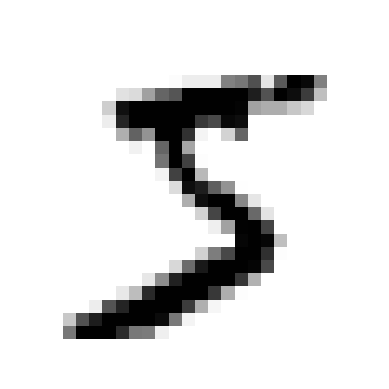

In [26]:
plt.imshow(train_images[0],cmap = plt.cm.binary)
plt.axis('off')
plt.show()

In [6]:
train_images = train_images/255
test_images = test_images/255

In [7]:
def model_CNN():
    model = keras.Sequential([keras.layers.Input(shape = (28,28,1)),
                             keras.layers.Conv2D(64,(3,3), activation = 'ReLU'),
                             keras.layers.MaxPooling2D(2,2),
                             keras.layers.Flatten(),
                             keras.layers.Dense(128, activation = 'ReLU'),
                             keras.layers.Dense(64, activation = 'ReLU'),
                             keras.layers.Dense(10, activation = 'sigmoid')],
                            name = 'CNN')
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [8]:
model = model_CNN()
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                               

In [9]:
history = model.fit(train_images,train_labels, epochs = 20, shuffle = True)

Epoch 1/20
1875/1875 [==============================] - 88s 46ms/step - loss: 0.1445 - accuracy: 0.9564
Epoch 2/20
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0504 - accuracy: 0.9843
Epoch 3/20
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0315 - accuracy: 0.9903
Epoch 4/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 5/20
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0150 - accuracy: 0.9951
Epoch 6/20
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0125 - accuracy: 0.9958
Epoch 7/20
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0094 - accuracy: 0.9968
Epoch 8/20
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0076 - accuracy: 0.9975
Epoch 9/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 10/20
1875/1875 [==============================] - 97s 

In [11]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0831 - accuracy: 0.9848


[0.0831349566578865, 0.9847999811172485]

In [12]:
ypred = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


In [13]:
ypred[:5]

array([[2.70051487e-06, 3.36037090e-07, 8.69169482e-04, 1.37094796e-01,
        1.35033843e-04, 4.26423730e-06, 1.24075888e-11, 1.00000000e+00,
        3.64000982e-07, 3.12250704e-05],
       [1.03989709e-02, 4.98599184e-05, 1.00000000e+00, 9.53379276e-06,
        1.14411485e-07, 1.35275237e-11, 5.71878864e-08, 6.79804893e-11,
        5.22788167e-02, 6.63601043e-07],
       [9.35200887e-07, 1.00000000e+00, 4.92879748e-03, 7.10873451e-07,
        3.35991114e-01, 5.23199618e-04, 4.40628526e-07, 1.57975078e-01,
        1.71048188e-04, 3.62380852e-05],
       [1.00000000e+00, 3.53074320e-05, 2.33754865e-04, 4.74133159e-08,
        5.89458523e-06, 2.93984594e-05, 8.11547600e-03, 1.53063575e-03,
        8.68143275e-07, 1.10441735e-02],
       [6.29280919e-07, 1.69919676e-05, 1.09672556e-02, 8.81664846e-07,
        1.00000000e+00, 2.34684837e-03, 2.10848870e-04, 2.21595042e-06,
        2.45082134e-04, 8.63607407e-01]], dtype=float32)

In [15]:
ypred_label = [np.argmax(i) for i in ypred]

In [16]:
ypred_label[:5]

[7, 2, 1, 0, 4]

In [17]:
test_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

1/1 [==============================] - 0s 84ms/step
given number is probably a 4


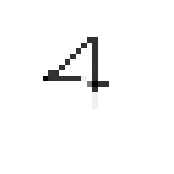

In [39]:
import cv2 as cv
img = cv.imread("four.jpg")[:,:,0]
img = cv.resize(img,(28,28))
img = np.invert(np.array([img]))
prediction = model.predict(img)
print("given number is probably a "+ str(np.argmax(prediction)))
plt.figure(figsize=(2,2))
plt.imshow(img[0],cmap = plt.cm.binary)
plt.axis("off")
plt.show()

# FASHION MNIST

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [19]:
fmnist = tf.keras.datasets.fashion_mnist

In [27]:
(train_images,train_labels),(test_images,test_labels) = fmnist.load_data()

In [28]:
train_images.shape

(60000, 28, 28)

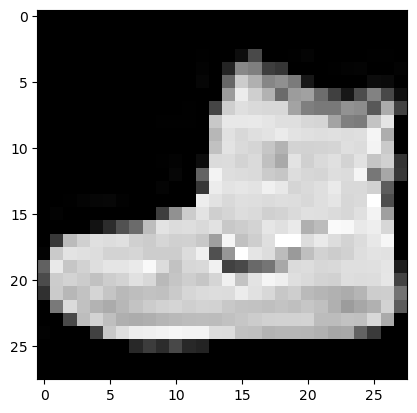

In [29]:
plt.imshow(train_images[0],cmap="gray")
plt.show()

In [30]:
train_images = train_images/255
test_images = test_images/255

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
def modelCNN2():
    model2 = keras.Sequential([keras.layers.Input(shape=(28,28,1)),
                              keras.layers.Conv2D(64, (3,3), activation = "ReLU"),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Conv2D(64, (3,3), activation = "ReLU"),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Flatten(),
                              keras.layers.Dense(128, activation = "ReLU"),
                              keras.layers.Dense(128, activation = "ReLU"),
                              keras.layers.Dense(10, activation = "sigmoid")],
                             name = "CNN_FMNIST")
    model2.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
    return model2
model2 = modelCNN2()
model2.summary()

Model: "CNN_FMNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               2

In [33]:
model2.fit(train_images,train_labels, epochs=5, shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 79s 41ms/step - loss: 0.4521 - accuracy: 0.8352
Epoch 2/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2951 - accuracy: 0.8914
Epoch 3/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2493 - accuracy: 0.9079
Epoch 4/5
1875/1875 [==============================] - 99s 53ms/step - loss: 0.2164 - accuracy: 0.9190
Epoch 5/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1906 - accuracy: 0.9284


In [34]:
val_loss,val_acc = model2.evaluate(test_images, test_labels)
print("Loss :"+ str(val_loss*100))
print("Accuracy :"+ str(val_acc*100))

313/313 [==============================] - 4s 13ms/step - loss: 0.2578 - accuracy: 0.9076
Loss :25.779137015342712
Accuracy :90.75999855995178


In [35]:
model2.save("Fashion.keras")

In [36]:
model2 = tf.keras.models.load_model("Fashion.keras")

1/1 [==============================] - 0s 161ms/step
Given number image is probably a 5


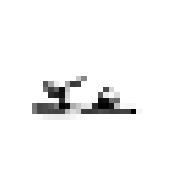

In [37]:
import cv2 as cv
img = cv.imread("sandal.jpg")[:,:,0]
img = cv.resize(img,(28,28))
img = np.invert(np.array([img]))
prediction = model2.predict(img)
print("Given number image is probably a " + str(np.argmax(prediction)))
plt.figure(figsize=(2,2))
plt.imshow(img[0], cmap=plt.cm.binary)
plt.axis("off")
plt.show()